### Steps to follow
1. Read and understand the data
2. Clean the data
3. Prepare the data for modeling
4. Modeling
5. Final analysis and business recomendation

***Importing libraries***

In [102]:
# Pandas
import pandas as pd
# Numpy
import numpy as np
# Libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns
# Supress warning
import warnings
warnings.filterwarnings('ignore')

# Step-1:- Read and understand the data

In [103]:
# Read the data
df = pd.read_csv('Country-data.csv')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [104]:
df.shape

(167, 10)

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [106]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


# Step-2:- Clean the data

### Missing value treatments

In [107]:
# Count missing values column wise
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

***Observations***

We can see that there are no missing values in any column. So as in rows.

### Creating new metrics

`export`, `health` and `imports` columns are given as %age of the Total GDP. So, converting them to the actual value of `gdpp`. 

In [108]:
df['exports'] = (df['exports']/100)*df['gdpp']
df['health'] = (df['health']/100)*df['gdpp']
df['imports'] = (df['imports']/100)*df['gdpp']
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


### Handling outliers

#### Checking the outliers

In [109]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

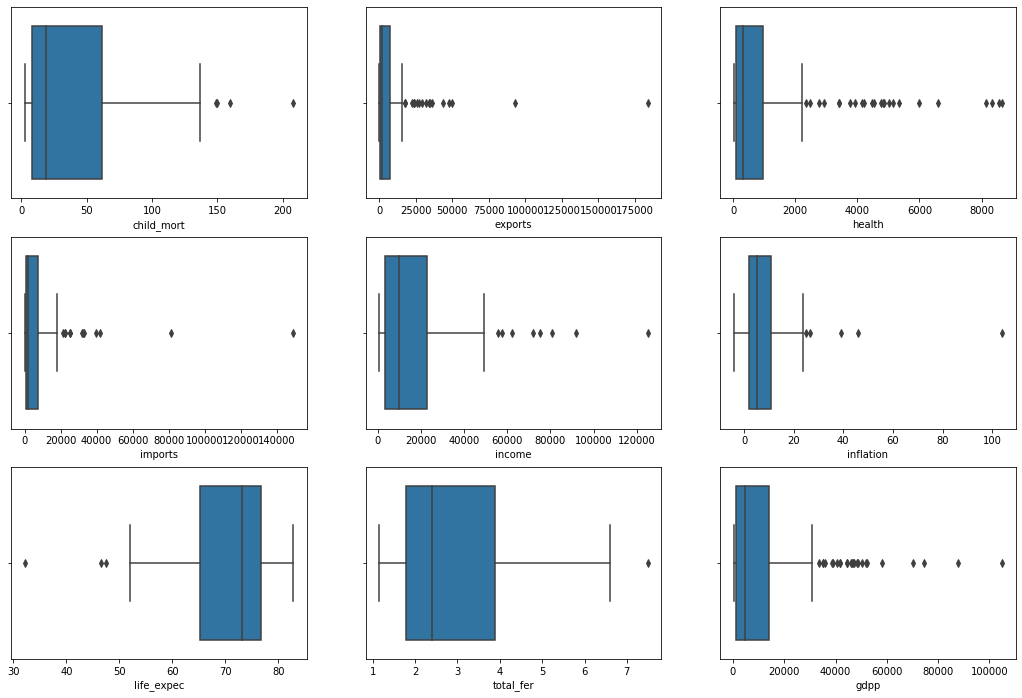

In [110]:
cols = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
plt.figure(figsize=(18,12))
for i in enumerate(cols):
    plt.subplot(3, 3, i[0]+1)
    sns.boxplot(x=i[1], data=df)

***Observations***
1. There are few outliers in imports, income, inflation.
3. Very less outliers life_expec, total_fer, child_mort
2. There are more outliers in health, exports, gdpp.

#### Capping the outliers
Reason for capping the outliers instead of removing them:- 
1. As we have only 167 records, by removing outliers we may loose few data.
2. We may remove the countries, which are in dire need of aid.

Before capping we are copying the dataframe df to a original dataframe df_original. Because after capping few of the variables values of the country will either cap to lower or higher value.

In [111]:
# Copying df to df_original, which we may use later
df_original = df.copy()
df_original.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [112]:
# Capping the outliers on 15th and 85th percentiles
for col in cols:
    q1 = df[col].quantile(0.15)
    q4 = df[col].quantile(0.85)
    df[col] = np.where(df[col] < q1, q1, df[col])
    df[col] = np.where(df[col] > q4, q4, df[col])    

In [113]:
df.shape

(167, 10)

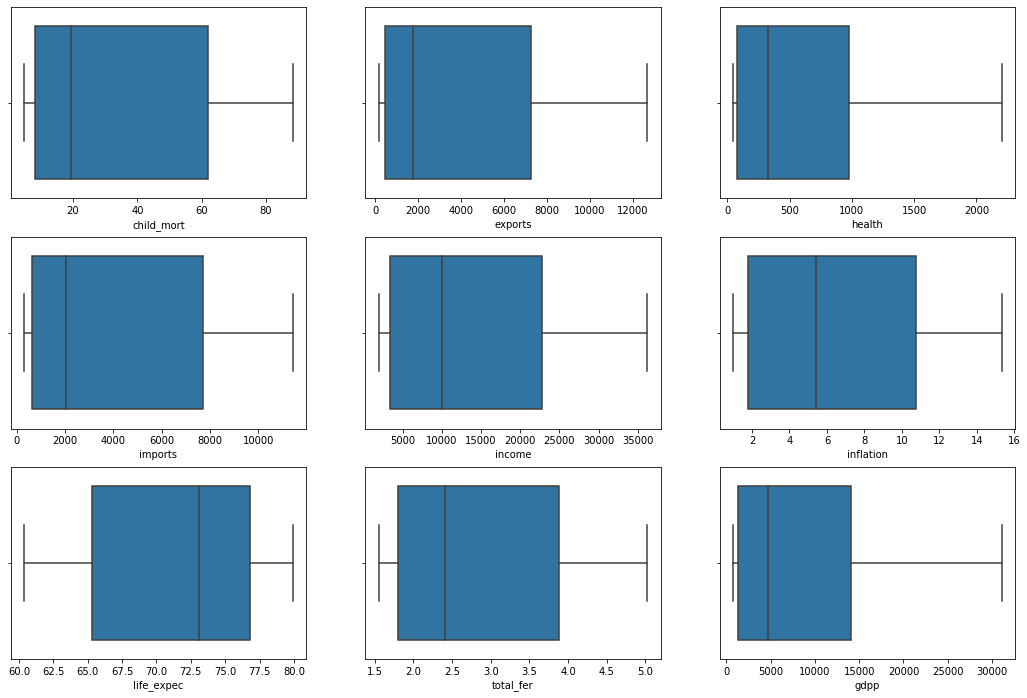

In [114]:
# Lets check the outliers again after capping
cols = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
plt.figure(figsize=(18,12))
for i in enumerate(cols):
    plt.subplot(3, 3, i[0]+1)
    sns.boxplot(x=i[1], data=df)

# Step-3:- Prepare the data for modeling

In [115]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,88.31,159.3216,45.63426,300.7194,1924.0,9.44,60.37,5.023,767.9
1,Albania,16.60,1145.2000,267.89500,1987.7400,9930.0,4.49,76.30,1.650,4090.0
2,Algeria,27.30,1712.6400,185.98200,1400.4400,12900.0,15.33,76.50,2.890,4460.0
3,Angola,88.31,2199.1900,100.60500,1514.3700,5900.0,15.33,60.37,5.023,3530.0
4,Antigua and Barbuda,10.30,5551.0000,735.66000,7185.8000,19100.0,1.44,76.80,2.130,12200.0


##### Preserve the `country` column to a variable, so that we can make use of it later after perfroming PCA

In [116]:
country = df['country'] 
country.head()

0            Afghanistan
1                Albania
2                Algeria
3                 Angola
4    Antigua and Barbuda
Name: country, dtype: object

In [117]:
# Now let's drop the country column as it is not a predictor in our data.
df_predictor = df.drop('country', axis=1)
df_predictor.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,88.31,159.3216,45.63426,300.7194,1924.0,9.44,60.37,5.023,767.9
1,16.60,1145.2000,267.89500,1987.7400,9930.0,4.49,76.30,1.650,4090.0
2,27.30,1712.6400,185.98200,1400.4400,12900.0,15.33,76.50,2.890,4460.0
3,88.31,2199.1900,100.60500,1514.3700,5900.0,15.33,60.37,5.023,3530.0
4,10.30,5551.0000,735.66000,7185.8000,19100.0,1.44,76.80,2.130,12200.0


### Scaling the data

In [118]:
# Scaling the features with Standard scaler
# Importing StandardScaler
from sklearn.preprocessing import StandardScaler
# Creating scaler instance
scaler = StandardScaler()
# Fit and transform the data into the scaler object
df_scaled =scaler.fit_transform(df_predictor)
df_scaled

array([[ 1.76892544, -0.8597187 , -0.80969839, ..., -1.53752198,
         1.69874282, -0.85024469],
       [-0.57452378, -0.64656156, -0.51911344, ...,  0.73005892,
        -0.95252934, -0.54695707],
       [-0.22485279, -0.52387514, -0.62620696, ...,  0.75852823,
         0.02214528, -0.51317831],
       ...,
       [-0.35557092, -0.69023606, -0.7522121 , ...,  0.27454989,
        -0.71672096, -0.80075424],
       [ 0.72285363, -0.80919501, -0.78064294, ..., -0.52259092,
         1.42127497, -0.80075424],
       [ 1.59866508, -0.77736884, -0.75693183, ..., -1.53752198,
         1.69874282, -0.78706015]])

### Principal component analysis

In [119]:
#Importing the PCA module
from sklearn.decomposition import PCA

In [120]:
# Creating PCA instance
pca = PCA(svd_solver = 'randomized', random_state = 42)

# Fit the scaled data into PCA instance
pca.fit(df_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [121]:
# Principal components
pca.components_

array([[-0.32322154,  0.35536191,  0.35893771,  0.36619997,  0.36897061,
        -0.17258519,  0.34082024, -0.30091478,  0.3656145 ],
       [ 0.47022898,  0.318198  ,  0.22001253,  0.24924756,  0.20959692,
         0.18693826, -0.34174672,  0.54074147,  0.28113331],
       [-0.16580372,  0.05492537, -0.10836081, -0.05179056,  0.15134713,
         0.94698664,  0.12717642, -0.13693036,  0.02132117],
       [-0.07047087,  0.47379911, -0.53875303,  0.38069979,  0.02638256,
        -0.06347698, -0.41798667, -0.28316439, -0.27521049],
       [ 0.21494385, -0.20854314,  0.36664819, -0.14624666,  0.04732333,
         0.05737702, -0.56791994, -0.63082188,  0.16878685],
       [-0.76933466, -0.11830667,  0.16311529, -0.01166162, -0.02790339,
         0.00908997, -0.49825351,  0.33830933,  0.06175873],
       [ 0.00763123,  0.11122401,  0.4204857 ,  0.42188472, -0.7400518 ,
         0.17214609,  0.07246192, -0.05105801, -0.21819132],
       [-0.00593939, -0.20344045, -0.42585937,  0.19516948, -0

##### How much variance is explained by the each principal component

In [122]:
pca.explained_variance_ratio_

array([0.73581322, 0.11712165, 0.09455579, 0.02055647, 0.01466721,
       0.00837603, 0.00579706, 0.00189682, 0.00121575])

PC1 = 73% variance

PC2 = 11% variance

PC3 = 9% variance

and so on.

##### Creating a scree plot for the explained variance

In [123]:
# Cumuliative varinace of the PCs
variance_cumu = np.cumsum(pca.explained_variance_ratio_)
variance_cumu

array([0.73581322, 0.85293487, 0.94749066, 0.96804713, 0.98271434,
       0.99109037, 0.99688743, 0.99878425, 1.        ])

Text(0, 0.5, 'Cumulative Variance')

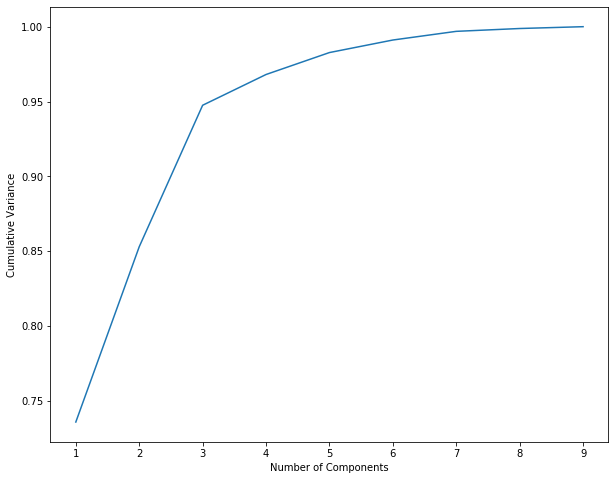

In [124]:
# Plotting scree plot
%matplotlib inline
fig = plt.figure(figsize = (10,8))
plt.plot(range(1,10),variance_cumu)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')

We can see that `3 components` explain 95% variance of the data. So, we will perform PCA with 3 components.

#### Perform PCA with 3 components

In [125]:
# Importing incremental PCA
from sklearn.decomposition import IncrementalPCA

In [126]:
# Instantiate PCA with 3 components
pca_final = IncrementalPCA(n_components=3)

In [127]:
# Fit and transform 
df_pca = pca_final.fit_transform(df_scaled)

In [128]:
# Check the shape now
df_pca.shape

(167, 3)

##### Creating a correlation matrix of the Principal Components

The correlation matrix will tell us how the PCs are correlated with each other. Ideally, there should be no correlation between the PCs or there shoud not be any multicollinearity issues.

In [129]:
corrmat = np.corrcoef(df_pca.transpose())

In [130]:
corrmat.shape

(3, 3)

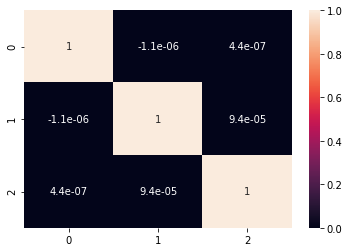

In [131]:
# Plotting the heatmap of the corr matrix
sns.heatmap(corrmat, annot=True)

We can see from the above matrix that hardly there is an correlation between the PCs. All the correlation is close to zero.

#### Creating the dataframe with the obtained Principal components

In [132]:
# Creating dataframe with principal components
pc = pd.DataFrame((df_pca))
# Renaming the columns with PC1, PC2 and PC3
df_pca = pd.DataFrame({'PC1': pc[0], 'PC2':pc[1], 'PC3':pc[2]})
df_pca.head()

,PC1,PC2,PC3
0,-3.317951,1.247179,-0.287582
1,-0.147136,-1.787522,-0.088019
2,-0.849612,-0.679292,1.761210
3,-3.013314,1.826594,0.841770
4,1.492131,-0.699114,-0.602117


# Step-4 :- Modeling

### Hopkins Statistics - Checking the clustering tendency

In [133]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [134]:
#Use the Hopkins Statistic function by passing the df_pca dataframe as a paramter
hopkins(df_pca)

0.8273342650303319

We can se after multiple run of the Hopkins Statistics, the value lies in the range between `0.80 to 0.87`. Hence, it is possible to cluster the data.

## K-Means Clustering

In [135]:
# Importing K-Means module
from sklearn.cluster import KMeans

### Finding optimum number of clusters
We will use both Silhoutte analysis and Elbow curve method for finding the optimal number of clusters.

### Silhoutte analysis

In [136]:
# Importing Silhoutte score module
from sklearn.metrics import silhouette_score

for num_clusters in range(2,10):
    # Instantiate k-means
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50, random_state=50)
    # Fit the 
    kmeans.fit(df_pca)
    # Labels of each cluster point 
    cluster_labels = kmeans.labels_
    
    silhoutte_avg = silhouette_score(df_pca, cluster_labels)
    print("For n_clusters={0} the silhoutte score={1}".format(num_clusters, silhoutte_avg))

For n_clusters=2 the silhoutte score=0.5274386620002927
For n_clusters=3 the silhoutte score=0.489854009581582
For n_clusters=4 the silhoutte score=0.42536269670816634
For n_clusters=5 the silhoutte score=0.4157196894850051
For n_clusters=6 the silhoutte score=0.43654988963240665
For n_clusters=7 the silhoutte score=0.4567867010256928
For n_clusters=8 the silhoutte score=0.45410977869452673
For n_clusters=9 the silhoutte score=0.45602754059338624


### Elbow curve method
SSD (Sum of squared distance) of the points of their respective clusters. Lesser the SSD, then number of cluster is optimum.

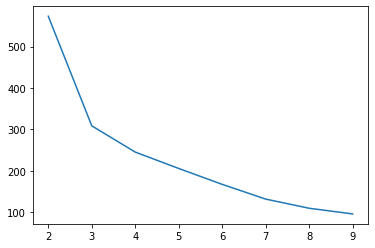

In [137]:
ssd = []
for k in range(2,10):
    kmeans = KMeans(n_clusters = k).fit(df_pca)
    ssd.append([k, kmeans.inertia_])
plt.plot(pd.DataFrame(ssd)[0], pd.DataFrame(ssd)[1])

We can see that according to Silhoutte analysis:- 

Silhoutte score for 2 clusters = 0.52

Silhoutte score for 3 clusters = 0.49

According to Elbow curve:-

At cluster number-3 the SSD decreased significantly.

***Hence, we can say that 3 may be the optimum cluster numbers.***

### K-Means with K=3 clusters

In [138]:
# Instantiate the K-Means with k=3
kmeans = KMeans(n_clusters=3, max_iter=50, random_state=50)
# Fit the model
kmeans.fit(df_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

In [139]:
# Labels of the clusters
kmeans.labels_

array([0, 2, 2, 0, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 0, 2, 2, 2, 0,
       2, 1, 2, 0, 0, 2, 0, 1, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 1, 1,
       1, 2, 2, 2, 2, 0, 0, 1, 2, 1, 1, 0, 0, 2, 1, 0, 1, 2, 2, 0, 0, 2,
       0, 1, 1, 0, 2, 2, 0, 1, 1, 1, 2, 1, 2, 2, 0, 0, 1, 2, 0, 2, 2, 0,
       0, 2, 1, 1, 2, 0, 0, 2, 2, 0, 1, 0, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2,
       1, 1, 0, 0, 1, 1, 0, 2, 2, 2, 2, 2, 1, 1, 2, 2, 0, 2, 1, 0, 2, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 2, 1, 1, 0, 0, 2, 0, 0, 2, 2, 2,
       2, 0, 2, 1, 1, 1, 2, 2, 0, 2, 2, 0, 0])

In [140]:
# Copying df_pca dataframe to df_kmeans
# We will use the df_pca dataframe in Hierarchical clustering as well
df_kmeans = df_pca.copy()

In [141]:
# Adding the cluster labels to the dataframe
df_kmeans['ClusterID-Kmeans'] = kmeans.labels_
df_kmeans.head()

,PC1,PC2,PC3,ClusterID-Kmeans
0,-3.317951,1.247179,-0.287582,0
1,-0.147136,-1.787522,-0.088019,2
2,-0.849612,-0.679292,1.761210,2
3,-3.013314,1.826594,0.841770,0
4,1.492131,-0.699114,-0.602117,2


In [142]:
# Adding the "country" column to the dataframe
# Making a country dataframe
df_country = pd.DataFrame(country)
df_country.head()

,country
0,Afghanistan
1,Albania
2,Algeria
3,Angola
4,Antigua and Barbuda


In [143]:
# Concat df_country and df_pca
df_kmeans = pd.concat([df_country, df_kmeans], axis=1)
df_kmeans.head()

,country,PC1,PC2,PC3,ClusterID-Kmeans
0,Afghanistan,-3.317951,1.247179,-0.287582,0
1,Albania,-0.147136,-1.787522,-0.088019,2
2,Algeria,-0.849612,-0.679292,1.761210,2
3,Angola,-3.013314,1.826594,0.841770,0
4,Antigua and Barbuda,1.492131,-0.699114,-0.602117,2


In [144]:
# Check the count of observation per cluster
df_kmeans['ClusterID-Kmeans'].value_counts()

2    70
0    53
1    44
Name: ClusterID-Kmeans, dtype: int64

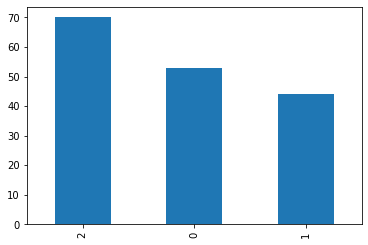

In [145]:
# Plotting the clusters count
df_kmeans['ClusterID-Kmeans'].value_counts().plot(kind='bar')

We can see that Cluster-0 has 53, Cluster-1 has 44 and CLuster-2 has 70 countries. It seems to be the clusters are well distributed.

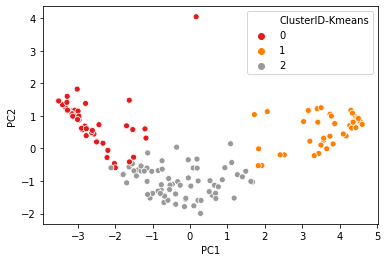

In [146]:
# Plot the Cluster with respect to the clusters obtained
# We are taking Pricipal compenents 1 and 2 as they represent most of the variance of the data.
sns.scatterplot(x = 'PC1', y = 'PC2', hue = 'ClusterID-Kmeans', data = df_kmeans, palette='Set1')

From the above plot we can easily identify three clusters. 

### Cluster Profiling K-Means

##### Merging the original data with Cluster Id

In [147]:
df_clustered_kmeans = pd.merge(df, df_kmeans[['country','ClusterID-Kmeans']], on='country')
df_clustered_kmeans.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID-Kmeans
0,Afghanistan,88.31,159.3216,45.63426,300.7194,1924.0,9.44,60.37,5.023,767.9,0
1,Albania,16.60,1145.2000,267.89500,1987.7400,9930.0,4.49,76.30,1.650,4090.0,2
2,Algeria,27.30,1712.6400,185.98200,1400.4400,12900.0,15.33,76.50,2.890,4460.0,2
3,Angola,88.31,2199.1900,100.60500,1514.3700,5900.0,15.33,60.37,5.023,3530.0,0
4,Antigua and Barbuda,10.30,5551.0000,735.66000,7185.8000,19100.0,1.44,76.80,2.130,12200.0,2


Now, we have the data associated with ClusterIDs.

##### Visualisations of the clusters with original variables `gdpp`, `child_mort` and `income` 

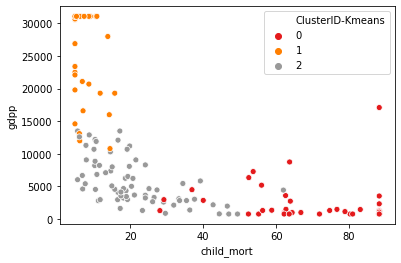

In [148]:
# Visualisations with child_mort and gdpp
sns.scatterplot(x = 'child_mort', y = 'gdpp', hue = 'ClusterID-Kmeans', data = df_clustered_kmeans, palette='Set1')

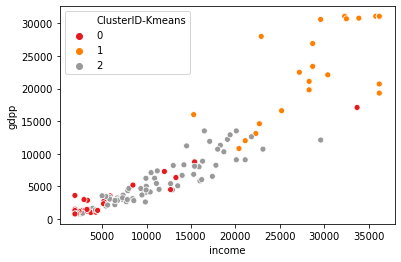

In [149]:
# Visualisations with income and gdpp
sns.scatterplot(x = 'income', y = 'gdpp', hue = 'ClusterID-Kmeans', data = df_clustered_kmeans, palette='Set1')

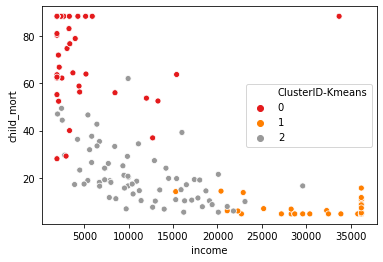

In [150]:
# Visualisations with child_mort and income
sns.scatterplot(x = 'income', y = 'child_mort', hue = 'ClusterID-Kmeans', data = df_clustered_kmeans, palette='Set1')

### Analysis of K-Means clusters

##### Checking the mean of `gdpp`, `child_mort` and `income`  for each cluster

In [151]:
df_clustered_kmeans[['gdpp', 'child_mort', 'income', 'ClusterID-Kmeans']].groupby('ClusterID-Kmeans').mean()

,gdpp,child_mort,income
ClusterID-Kmeans,,,
0,2004.767925,74.221698,4124.716981
1,26717.045455,6.631818,32427.272727
2,5739.311429,21.180000,11428.000000


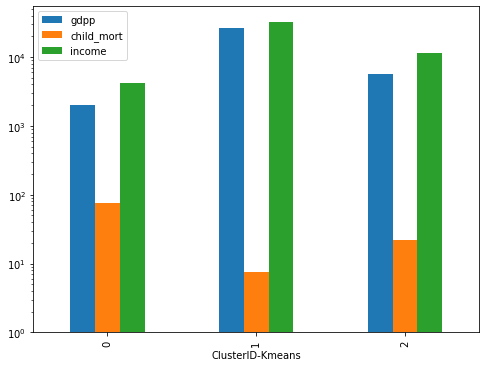

In [152]:
# Plotting the mean of the variables for each cluster
df_clustered_kmeans[['gdpp', 'child_mort', 'income', 'ClusterID-Kmeans']].groupby('ClusterID-Kmeans').mean().plot(kind='bar',log=True,figsize = (8,6))

From the above plot, we can see that :-
1. GDPP is very low for Cluster-0 compare to other two clusters.
2. Child mortality rate is the highest for Cluster-0.
3. Income per person is the lowest for Cluster-0

##### Checking the distribution of `gdpp`, `child_mort` and `income` variables for each cluster

In [153]:
var_analysis = ['gdpp', 'child_mort', 'income']

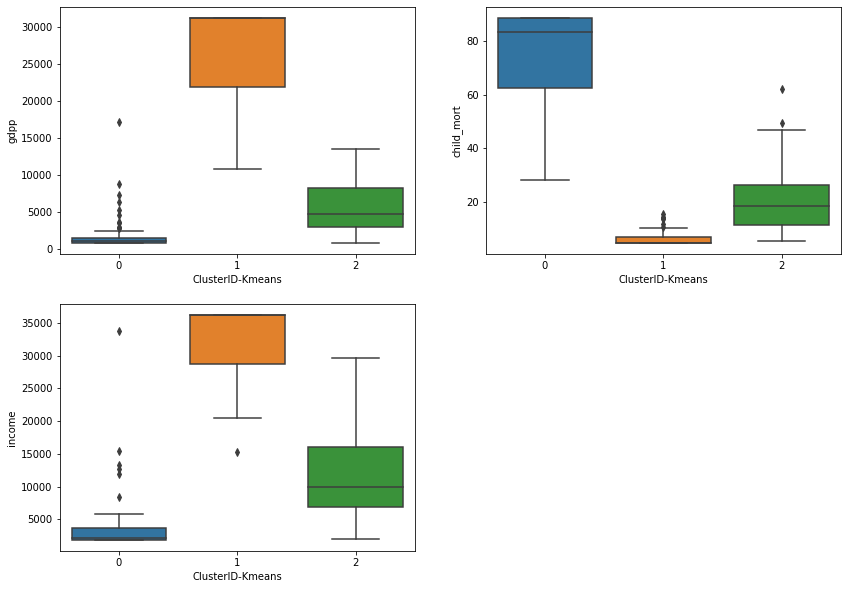

In [154]:
plt.figure(figsize = (14,10))
for i in enumerate(var_analysis):
    plt.subplot(2,2,i[0]+1)
    sns.boxplot(x= 'ClusterID-Kmeans', y = i[1], data = df_clustered_kmeans)

***Analysis***
1. `GDPP-` We can see that for Cluster-0 the GDPP is very low compare to rest of the clusters. Cluster-1 has countries has the highest GDPP.
2. `child_mort-`  CLuster-0 has the highest child mortality rate and CLuster-0 has the lowest.
3. `income-` CLuster-0 has the lowest new income per person and Cluster-1 has the highest.

***Conclusion***

Cluster-0 countries are in the direst need of aid. There are `53 countries` in cluster-0.

#### Find the countries belong to Cluster-0

In [155]:
df_clustered_kmeans_needy = df_clustered_kmeans[df_clustered_kmeans['ClusterID-Kmeans']==0]
df_clustered_kmeans_needy.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID-Kmeans
0,Afghanistan,88.31,159.3216,45.63426,300.7194,1924.0,9.4400,60.37,5.023,767.9,0
3,Angola,88.31,2199.1900,100.60500,1514.3700,5900.0,15.3300,60.37,5.023,3530.0,0
17,Benin,88.31,180.4040,45.63426,300.7194,1924.0,0.9895,61.80,5.023,767.9,0
21,Botswana,52.50,2768.6000,527.05000,3257.5500,13300.0,8.9200,60.37,2.880,6350.0,0
25,Burkina Faso,88.31,159.3216,45.63426,300.7194,1924.0,6.8100,60.37,5.023,767.9,0


In [156]:
# Creating a dataframe of needy countries with original variable values, what were cahnged after capping
df_clustered_kmeans_needy_1 = df_original[df_original['country'].isin(df_clustered_kmeans_needy['country'].tolist())]
df_clustered_kmeans_needy_1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.300,41.9174,248.297,1610,9.440,56.2,5.82,553
3,Angola,119.0,2199.190,100.6050,1514.370,5900,22.400,60.1,6.16,3530
17,Benin,111.0,180.404,31.0780,281.976,1820,0.885,61.8,5.36,758
21,Botswana,52.5,2768.600,527.0500,3257.550,13300,8.920,57.1,2.88,6350
25,Burkina Faso,116.0,110.400,38.7550,170.200,1430,6.810,57.9,5.87,575


###### Selecting top 10 needy countries of K-Means clustering

In [157]:
# Sorting the needy countries with lower GDPP, higher child_mort and lower income
# Selecting top 10 needy countries
df_clustered_kmeans_needy_1 = df_clustered_kmeans_needy_1.sort_values(['gdpp', 'income', 'child_mort'], ascending=[True, True, False])
df_clustered_kmeans_needy_1.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.30,57.7,6.26,231
88,Liberia,89.3,62.4570,38.5860,302.802,700,5.47,60.8,5.02,327
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.80,57.5,6.54,334
112,Niger,123.0,77.2560,17.9568,170.868,814,2.55,58.8,7.49,348
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220,17.20,55.0,5.20,399
93,Madagascar,62.2,103.2500,15.5701,177.590,1390,8.79,60.8,4.60,413
106,Mozambique,101.0,131.9850,21.8299,193.578,918,7.64,54.5,5.56,419
31,Central African Republic,149.0,52.6280,17.7508,118.190,888,2.01,47.5,5.21,446
94,Malawi,90.5,104.6520,30.2481,160.191,1030,12.10,53.1,5.31,459
50,Eritrea,55.2,23.0878,12.8212,112.306,1420,11.60,61.7,4.61,482


## Hierarchical Clustering

In [158]:
# Importing packages
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [159]:
df_pca.head()

,PC1,PC2,PC3
0,-3.317951,1.247179,-0.287582
1,-0.147136,-1.787522,-0.088019
2,-0.849612,-0.679292,1.761210
3,-3.013314,1.826594,0.841770
4,1.492131,-0.699114,-0.602117


### Using Single linkage

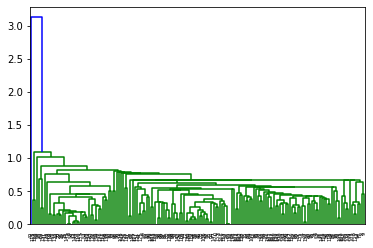

In [160]:
# Using single linkage and storing the results in 'mergings' variable
mergings = linkage(df_pca, method='single', metric='euclidean')
# Creating Dendrograms of the mergings
dendrogram(mergings)
plt.show()

As we can clearly see, single linkage doesn't produce a good enough result for us to analyse the clusters. Hence, we need to go ahead and utilise the complete linkage method and then analyse the clusters once again.

### Using Complete linkage

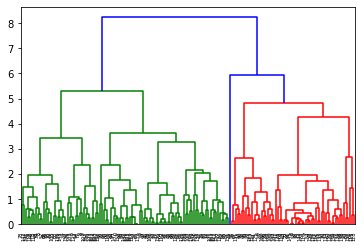

In [161]:
# Complete linkage
mergings = linkage(df_pca, method='complete', metric='euclidean')
# Creating Dendrograms of the mergings
dendrogram(mergings)
plt.show()

Lets cut the dendrogram at the height 5. Then we will have 4 points to cut the dendrogram. That means we have 4 clusters.

##### Performing the Hierarchical clustering with 4 clusters

In [162]:
# 4 clusters shape
cut_tree(mergings, n_clusters=4).shape

(167, 1)

We can see that the output is a numpy series of (167, 1) size. The cluster numbers are stored in an array of an array. We need to make it as one dimensional array. 

In [163]:
# Creating one dimensional array
cluster_labels = cut_tree(mergings, n_clusters=4).reshape(-1,)
cluster_labels

array([0, 1, 1, 0, 2, 1, 1, 2, 2, 1, 2, 2, 0, 2, 1, 2, 1, 0, 0, 0, 1, 0,
       2, 2, 2, 0, 0, 0, 0, 2, 1, 0, 0, 2, 1, 1, 0, 0, 0, 2, 0, 2, 2, 2,
       2, 1, 1, 0, 1, 3, 0, 2, 0, 2, 2, 0, 0, 1, 2, 0, 2, 1, 0, 0, 0, 0,
       0, 2, 2, 0, 1, 1, 0, 2, 2, 2, 1, 2, 1, 1, 0, 0, 2, 0, 0, 2, 2, 0,
       0, 2, 2, 2, 1, 0, 0, 2, 2, 0, 2, 0, 2, 0, 1, 1, 2, 1, 0, 0, 0, 1,
       2, 2, 0, 0, 2, 2, 0, 2, 1, 1, 0, 2, 2, 2, 2, 1, 0, 0, 2, 0, 1, 2,
       0, 2, 2, 2, 0, 0, 2, 2, 1, 1, 0, 1, 2, 2, 0, 0, 1, 0, 0, 0, 1, 2,
       0, 0, 1, 2, 2, 2, 2, 1, 0, 1, 1, 0, 0])

In [164]:
# Copying df_pca dataframe to df_hierarchical
df_hierarchical = df_pca.copy()

In [165]:
# Adding the cluster labels to the dataframe
df_hierarchical['ClusterID-Hierarchical'] = cluster_labels
df_hierarchical.head()

,PC1,PC2,PC3,ClusterID-Hierarchical
0,-3.317951,1.247179,-0.287582,0
1,-0.147136,-1.787522,-0.088019,1
2,-0.849612,-0.679292,1.761210,1
3,-3.013314,1.826594,0.841770,0
4,1.492131,-0.699114,-0.602117,2


In [166]:
# Concat df_country and df_hierarchical
df_hierarchical = pd.concat([df_country, df_hierarchical], axis=1)
df_hierarchical.head()

,country,PC1,PC2,PC3,ClusterID-Hierarchical
0,Afghanistan,-3.317951,1.247179,-0.287582,0
1,Albania,-0.147136,-1.787522,-0.088019,1
2,Algeria,-0.849612,-0.679292,1.761210,1
3,Angola,-3.013314,1.826594,0.841770,0
4,Antigua and Barbuda,1.492131,-0.699114,-0.602117,2


In [167]:
# Check the count of observation per cluster
df_hierarchical['ClusterID-Hierarchical'].value_counts()

0    65
2    62
1    39
3     1
Name: ClusterID-Hierarchical, dtype: int64

We can see that Cluster-0 has 65, Cluster-1 has 62 and CLuster-2 has 39 and Cluster-3 have 1 countries. It seems to be the clusters are well distributed.

###### Cluster-3 has only one country. The explanation of the reason given later.

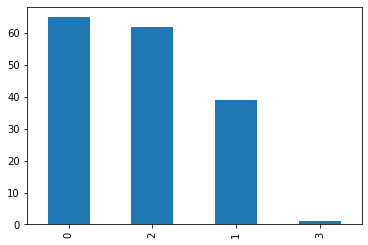

In [168]:
# Plotting the clusters count
df_hierarchical['ClusterID-Hierarchical'].value_counts().plot(kind='bar')

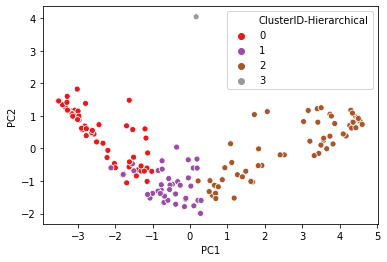

In [169]:
# Plot the Cluster with respect to the clusters obtained
# We are taking Pricipal components 1 and 2 as they represent most of the variance of the data.
sns.scatterplot(x = 'PC1', y = 'PC2', hue = 'ClusterID-Hierarchical', data = df_hierarchical, palette='Set1')

From the above plot we can easily identify four clusters.

### Cluster Profiling Hierarchical

##### Merging the original data with Cluster Id

In [170]:
df_clustered_hierarchical = pd.merge(df, df_hierarchical[['country','ClusterID-Hierarchical']], on='country')
df_clustered_hierarchical.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID-Hierarchical
0,Afghanistan,88.31,159.3216,45.63426,300.7194,1924.0,9.44,60.37,5.023,767.9,0
1,Albania,16.60,1145.2000,267.89500,1987.7400,9930.0,4.49,76.30,1.650,4090.0,1
2,Algeria,27.30,1712.6400,185.98200,1400.4400,12900.0,15.33,76.50,2.890,4460.0,1
3,Angola,88.31,2199.1900,100.60500,1514.3700,5900.0,15.33,60.37,5.023,3530.0,0
4,Antigua and Barbuda,10.30,5551.0000,735.66000,7185.8000,19100.0,1.44,76.80,2.130,12200.0,2


Now, we have the data associated with ClusterIDs.

##### Visualisations of the clusters with original variables `gdpp`, `child_mort` and `income` 

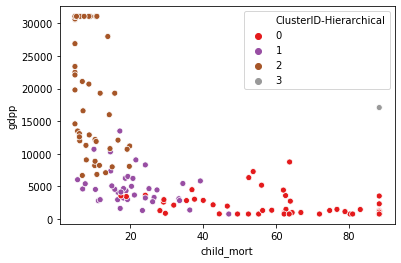

In [171]:
# Visualisations with child_mort and gdpp
sns.scatterplot(x = 'child_mort', y = 'gdpp', hue = 'ClusterID-Hierarchical', data = df_clustered_hierarchical, palette='Set1')

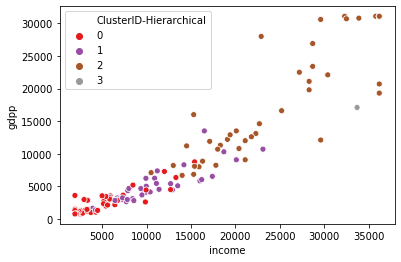

In [172]:
# Visualisations with income and gdpp
sns.scatterplot(x = 'income', y = 'gdpp', hue = 'ClusterID-Hierarchical', data = df_clustered_hierarchical, palette='Set1')

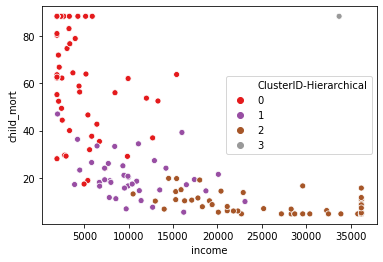

In [173]:
# Visualisations with income and child_mort
sns.scatterplot(x = 'income', y = 'child_mort', hue = 'ClusterID-Hierarchical', data = df_clustered_hierarchical, palette='Set1')

### Analysis of Hierarchical clusters

##### Checking the mean of `gdpp`, `child_mort` and `income`  for each cluster

In [174]:
df_clustered_hierarchical[['gdpp', 'child_mort', 'income', 'ClusterID-Hierarchical']].groupby('ClusterID-Hierarchical').mean()

,gdpp,child_mort,income
ClusterID-Hierarchical,,,
0,1868.255385,66.377538,4002.615385
1,4871.997436,20.607692,10448.717949
2,21855.000000,8.090323,28129.032258
3,17100.000000,88.310000,33700.000000


###### Reason for having Cluster-3 only one country

In [175]:
# Lets see the Cluster-3 country 
df_clustered_hierarchical[df_clustered_hierarchical['ClusterID-Hierarchical']==3]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID-Hierarchical
49,Equatorial Guinea,88.31,12667.23,766.08,10071.9,33700.0,15.33,60.9,5.023,17100.0,3


We can see the Cluster-3 country Equatorial Guinea has high GDPP and high income. However, it has high child_mort as well. If we look at the above mean table, then Cluster-0 has low income and low gdpp and high child_mort but not as high as Equatorial Guinea.

Also, cluster-1 has high gdpp and high income but not as high as Equatorial Guinea and very low child_mort compared to Equatorial Guine.

Hence, Cluster-3 country Equatorial Guinea has formed a single cluster.

###### Plotting the mean of the variables for each cluster

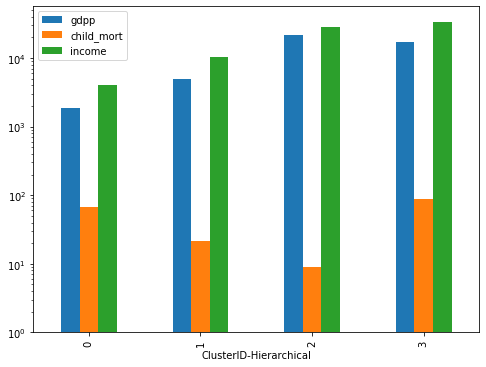

In [176]:
# Plotting the mean of the variables for each cluster
df_clustered_hierarchical[['gdpp', 'child_mort', 'income', 'ClusterID-Hierarchical']].groupby('ClusterID-Hierarchical').mean().plot(kind='bar',log=True,figsize = (8,6))

From the above plot, we can see that :-
1. GDPP is very low for Cluster-0 compare to other clusters.
2. Child mortality rate is the highest for Cluster-0.
3. Income per person is the lowest for Cluster-0

##### Checking the distribution of `gdpp`, `child_mort` and `income` variables for each cluster

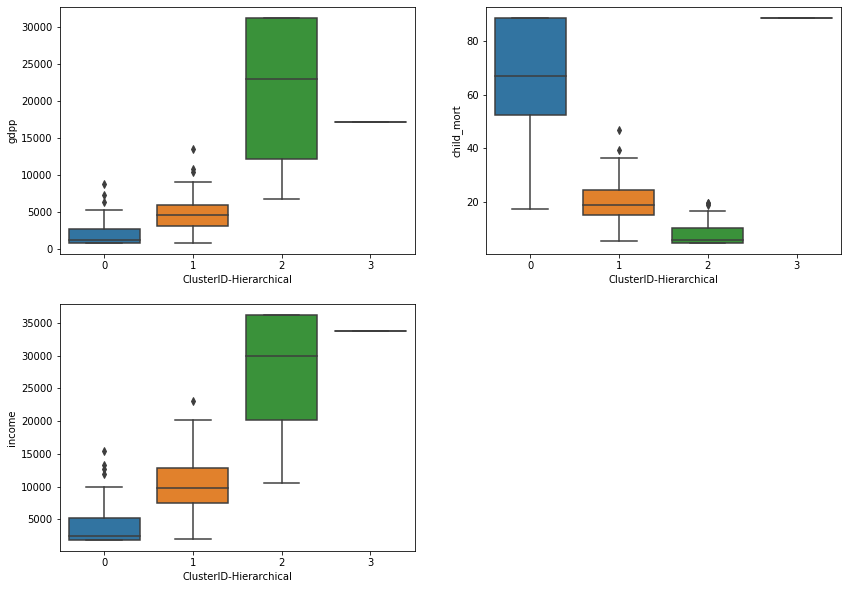

In [177]:
plt.figure(figsize = (14,10))
for i in enumerate(var_analysis):
    plt.subplot(2,2,i[0]+1)
    sns.boxplot(x= 'ClusterID-Hierarchical', y = i[1], data = df_clustered_hierarchical)

***Analysis***
1. `GDPP-` We can see that for Cluster-0 the GDPP is very low compare to rest of the clusters. Cluster-2 has countries has the highest GDPP.
2. `child_mort-`  CLuster-0 has the highest child mortality rate.
3. `income-` CLuster-0 has the lowest net income per person.

***Conclusion***

Cluster-0 countries are in the direst need of aid. There are `65 countries` in Cluster-0.

#### Find the countries belong to Cluster-0

In [178]:
df_clustered_hierarchical_needy = df_clustered_hierarchical[df_clustered_hierarchical['ClusterID-Hierarchical']==0]
df_clustered_hierarchical_needy.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID-Hierarchical
0,Afghanistan,88.31,159.3216,45.63426,300.7194,1924.0,9.4400,60.37,5.023,767.9,0
3,Angola,88.31,2199.1900,100.60500,1514.3700,5900.0,15.3300,60.37,5.023,3530.0,0
12,Bangladesh,49.40,159.3216,45.63426,300.7194,2440.0,7.1400,70.40,2.330,767.9,0
17,Benin,88.31,180.4040,45.63426,300.7194,1924.0,0.9895,61.80,5.023,767.9,0
18,Bhutan,42.70,926.5000,113.36000,1541.2600,6420.0,5.9900,72.10,2.380,2180.0,0


In [179]:
# Creating a dataframe of needy countries with original variable values, what were cahnged after capping
df_clustered_hierarchical_needy_1 = df_original[df_original['country'].isin(df_clustered_hierarchical_needy['country'].tolist())]
df_clustered_hierarchical_needy_1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.300,41.9174,248.297,1610,9.440,56.2,5.82,553
3,Angola,119.0,2199.190,100.6050,1514.370,5900,22.400,60.1,6.16,3530
12,Bangladesh,49.4,121.280,26.6816,165.244,2440,7.140,70.4,2.33,758
17,Benin,111.0,180.404,31.0780,281.976,1820,0.885,61.8,5.36,758
18,Bhutan,42.7,926.500,113.3600,1541.260,6420,5.990,72.1,2.38,2180


###### Selecting top 10 needy countries of Hierarchical clustering

In [180]:
# Sorting the needy countries with lower GDPP, higher child_mort and lower income
# Selecting top 10 needy countries
df_clustered_hierarchical_needy_1 = df_clustered_hierarchical_needy_1.sort_values(['gdpp', 'income', 'child_mort'], ascending=[True, True, False])
df_clustered_hierarchical_needy_1.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.30,57.7,6.26,231
88,Liberia,89.3,62.4570,38.5860,302.802,700,5.47,60.8,5.02,327
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.80,57.5,6.54,334
112,Niger,123.0,77.2560,17.9568,170.868,814,2.55,58.8,7.49,348
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220,17.20,55.0,5.20,399
93,Madagascar,62.2,103.2500,15.5701,177.590,1390,8.79,60.8,4.60,413
106,Mozambique,101.0,131.9850,21.8299,193.578,918,7.64,54.5,5.56,419
31,Central African Republic,149.0,52.6280,17.7508,118.190,888,2.01,47.5,5.21,446
94,Malawi,90.5,104.6520,30.2481,160.191,1030,12.10,53.1,5.31,459
50,Eritrea,55.2,23.0878,12.8212,112.306,1420,11.60,61.7,4.61,482


### Comparision of K-Means and Hierarchical clustering

We can see from the K-Means and Hierarchical clustering, the top 10 needy countries are same according to both the clusters.

However, we go 53 countries by using K-Means clustering and 65 countries by using Hierarchical clustering. So, we are taking the common countries, which are present in both the lists.

#### Now let's find the common countries, which are in need of aid, from K-Means and Hierarchical clustering 

In [181]:
# Inner merge df_clustered_kmeans_needy and df_clustered_hierarchical_needy
df_needy_countries = pd.merge(df_clustered_kmeans_needy, df_clustered_hierarchical_needy, how='inner')
df_needy_countries.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID-Kmeans,ClusterID-Hierarchical
0,Afghanistan,88.31,159.3216,45.63426,300.7194,1924.0,9.4400,60.37,5.023,767.9,0,0
1,Angola,88.31,2199.1900,100.60500,1514.3700,5900.0,15.3300,60.37,5.023,3530.0,0,0
2,Benin,88.31,180.4040,45.63426,300.7194,1924.0,0.9895,61.80,5.023,767.9,0,0
3,Botswana,52.50,2768.6000,527.05000,3257.5500,13300.0,8.9200,60.37,2.880,6350.0,0,0
4,Burkina Faso,88.31,159.3216,45.63426,300.7194,1924.0,6.8100,60.37,5.023,767.9,0,0


In [182]:
df_needy_countries.shape

(52, 12)

We can see that there are 52 countries, which are in need of aid.

In [183]:
# Creating a dataframe of needy countries with original variable values, what were cahnged after capping
df_needy_countries_1 = df_original[df_original['country'].isin(df_needy_countries['country'].tolist())]
df_needy_countries_1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.300,41.9174,248.297,1610,9.440,56.2,5.82,553
3,Angola,119.0,2199.190,100.6050,1514.370,5900,22.400,60.1,6.16,3530
17,Benin,111.0,180.404,31.0780,281.976,1820,0.885,61.8,5.36,758
21,Botswana,52.5,2768.600,527.0500,3257.550,13300,8.920,57.1,2.88,6350
25,Burkina Faso,116.0,110.400,38.7550,170.200,1430,6.810,57.9,5.87,575


##### Sorting the needy countries with lower GDPP, higher child_mort and lower income

In [184]:
# Sorting
df_needy_countries_1 = df_needy_countries_1.sort_values(['gdpp', 'income', 'child_mort'], ascending=[True, True, False])
df_needy_countries_1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.30,57.7,6.26,231
88,Liberia,89.3,62.4570,38.5860,302.802,700,5.47,60.8,5.02,327
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.80,57.5,6.54,334
112,Niger,123.0,77.2560,17.9568,170.868,814,2.55,58.8,7.49,348
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220,17.20,55.0,5.20,399


##### Top 10 needy countries 

In [185]:
df_needy_Top_10 = df_needy_countries_1.head(10)
df_needy_Top_10

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.30,57.7,6.26,231
88,Liberia,89.3,62.4570,38.5860,302.802,700,5.47,60.8,5.02,327
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.80,57.5,6.54,334
112,Niger,123.0,77.2560,17.9568,170.868,814,2.55,58.8,7.49,348
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220,17.20,55.0,5.20,399
93,Madagascar,62.2,103.2500,15.5701,177.590,1390,8.79,60.8,4.60,413
106,Mozambique,101.0,131.9850,21.8299,193.578,918,7.64,54.5,5.56,419
31,Central African Republic,149.0,52.6280,17.7508,118.190,888,2.01,47.5,5.21,446
94,Malawi,90.5,104.6520,30.2481,160.191,1030,12.10,53.1,5.31,459
50,Eritrea,55.2,23.0878,12.8212,112.306,1420,11.60,61.7,4.61,482


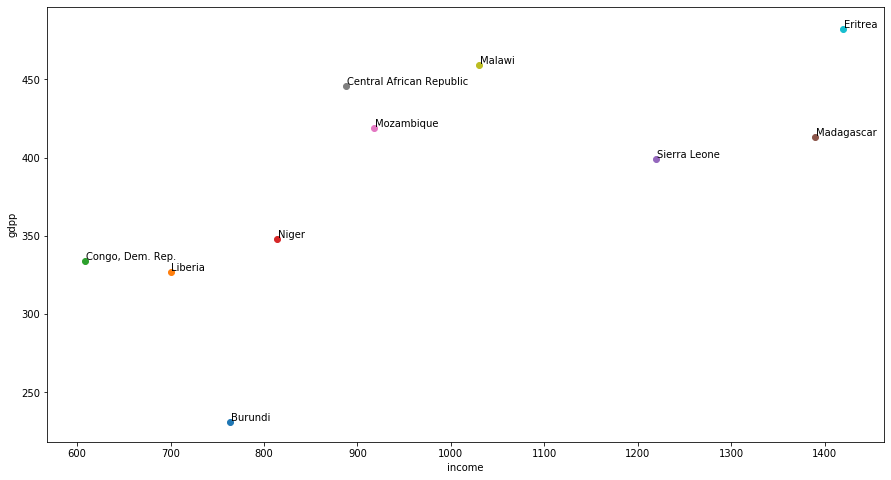

In [186]:
# Plot of top 10 needy countries with their gdpp and income
plt.figure(figsize=(15,8))
for i,country in enumerate(df_needy_Top_10['country'].tolist()):
    x = df_needy_Top_10['income'].tolist()[i]
    y = df_needy_Top_10['gdpp'].tolist()[i]
    plt.scatter(x, y)
    plt.text(x+.8, y+.8, country)
plt.xlabel('income')
plt.ylabel('gdpp')
plt.show()

### Final conclusion

By analysing both in K-Means and Hierarchical(Single and Complete linkage), we can finally got the list of countries, which are in direst need of aid. Below are the top needy countries with highest priorities, we can report to the CEO.

1. Burundi
2. Liberia
3. Congo, Dem. Rep.
4. Niger
5. Sierra Leone
6. Madagascar
7. Mozambique
8. Central African Republic
9. Malawi
10. Eritrea